WARNING    "t" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 1.008 * second. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Missing compiler_cxx fix for MSVCCompiler


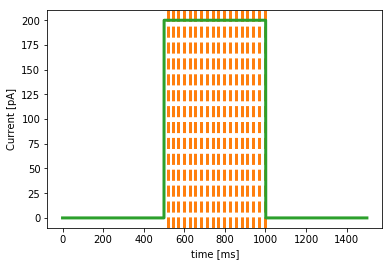

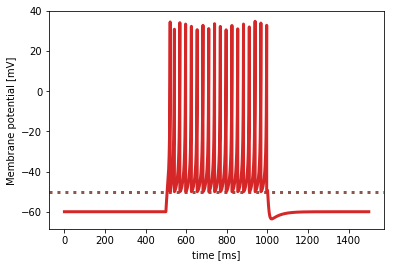

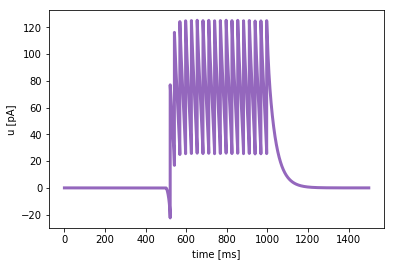

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

# Descrição dos parâmetros
C = 100*pF; EL = -60*mV; VT = -40*mV; a = 0.03/ms; b = -2*pA/mV; Vmax = 35*mV; 
vreset = -50*mV; d = 100*b2.pA 
k = 0.7*pA/mV**2;
duration = 1500*ms;

# Corrente de entrada
Ix = input_factory.get_step_current(
    t_start=500, t_end=1000, unit_time=b2.ms,
    amplitude= 200*pA) 

# Descrição do modelo neurônio 
start_scope()
eqs = '''dvm/dt = ((k/C)*(((vm-EL)*(vm-VT)))- (u/C) + (Ix(t,i)/C)) : volt
         du/dt = (a)*(b*(vm-EL)-u) : amp'''
G = NeuronGroup(1, eqs,
                    threshold='vm > Vmax',
                    reset='vm= vreset; u = u + d', method='euler', dt= 0.1*ms)

statemon = StateMonitor(G, ["vm","u"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G) # monitor de spikes
G.vm = EL
G.u = 0

# Rodando a simulação
run(duration)

# Plot
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
plt.figure(1)
current= Ix(statemon.t,0)
plt.plot(statemon.t/b2.ms, current/b2.pA, c='C2', lw=3)
xlabel('time [ms]')
ylabel('Current [pA]')
plt.figure(2)
axhline(-50, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, statemon.vm[0]/b2.mV, c='C3', lw=3)
xlabel('time [ms]')
ylabel('Membrane potential [mV]')
plt.figure(3)
plt.plot(statemon.t/b2.ms, statemon.u[0]/b2.pA, c='C4', lw=3)
xlabel('time [ms]')
ylabel('u [pA]')
plt.show()
